# Basic data visualization in R

The objective of this chapter is to familiarize with the basic data visualization methods in R. We are going to focus on 
1. R default plotting library
2. ggplot2

First, install R in Ananconda to use Jupyter Notebook https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/ <br>
Note that all essential packages in R will be downloaded. To install a package in R, call ``install.packages("package_name")`` <br>
An Introduction to R @ https://cran.r-project.org/manuals.html <br>
Lot of examples @ https://www.r-graph-gallery.com/

# Today's objective

1. Recall - Last week
2. Last week lab
3. Data visualization in R
> 1. R default plotting<br>
> 2. Ggplot2


### Breaks:
1. 10:30 - 10:40
2. 11:40 - 11:50

For help in R, invoking ``?`` followed by the function.

In [1]:
?plot 

# R default plotting 

### Line Plot
Since R was create for statistical purpose, the ``plot()`` function by default is a scatter plot. 

To create a line plot, use ``plot``  with ``type="l"``<br>
Data type: 
> Numerics

Argument Input types:
> vector, data frame

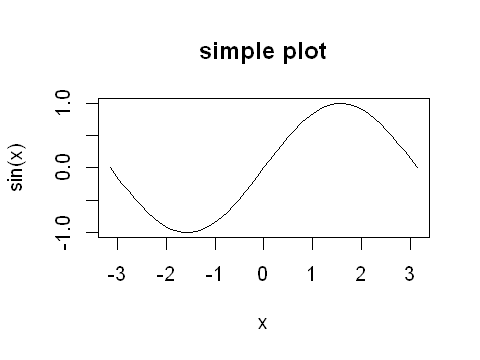

In [6]:
# Resizing the plot window
library(repr)
options(repr.plot.width=4, repr.plot.height=3)
# this is in an interactive mode windows(4,4)
# create an array of values
x <- seq(-pi, pi, 2*pi/50.0) # np.arange(-pi, pi, step), np.linspace(-pi, pi, step_size)
# "<-" samething as "="
plot(x, sin(x), type="l", main="simple plot")

Calling ``plot()`` multiple times might replace the previous graph. So, use ``lines()`` to have all graph in the same window

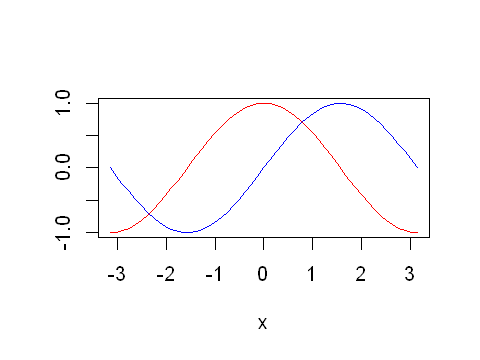

In [4]:
# Multiple plot in the same window
plot(x, sin(x), type="l", col="blue", ylab="")
# use lines
lines(x, cos(x), col="red")

To save the graph in R:
1. choose from the available extension in R and give the chart file a name
- ``pdf("filename.pdf")``
- ``png("filename.png")``
- ``jpeg("filename.jpeg")``
- ``svg("filename.svg")``
- ``tiff("filename.tiff")``
- ``postcript("filename.ps")``
2. plot the chart
3. save the file using ``dev.off()``

In [10]:
# 1. choose an extension, here, I choose png
pdf(file="C:\\Users\\famille\\Desktop\\my_plot.pdf")
# Multiple plot in the same window
plot(x, sin(x), type="l", col="blue", ylab="")
# use lines
lines(x, cos(x), col="red")
# save the file
dev.off()

png 
  2

In [11]:
?plot

### Scatter plot

To create a scatter plot, use ``plot()`` with the default argument

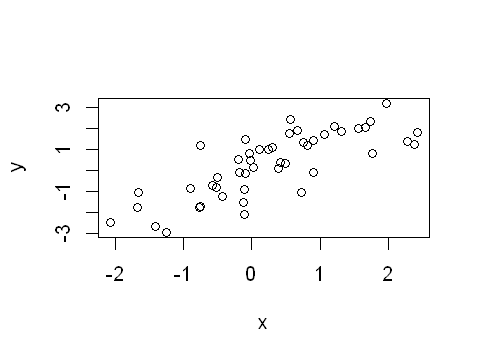

In [14]:
# sampling from Standard Normal Distribution
x <- rnorm(50)
# create a linear relationship
y <- x + rnorm(50)
plot(x, y)

### Box Plot
To create a box plot, use ``boxplot()``<br>
Data type: 
> Numerics

Argument Input types:
> vector, list, or data frame

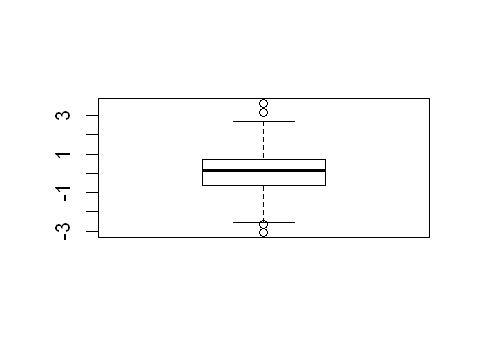

In [17]:
#set.seed(42)
x <- rnorm(500)
boxplot(x)

In [15]:
?hist

### Histogram

To create a historgram, use ``hist()``

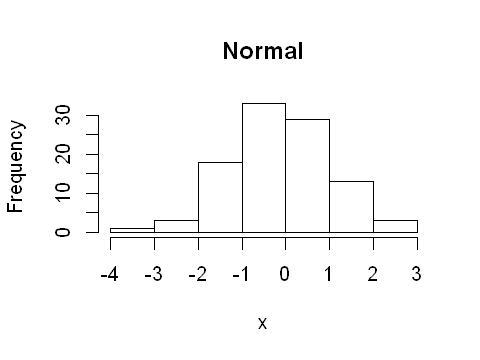

In [18]:
x <- rnorm(100)
hist(x, main = "Normal")

In [21]:
?rnorm

### Pie Chart
To create a pie chart, use ``pie()``

In [16]:
# Create a categorical data
expenditure <- c(Housing=600, Food=300, Cloths=150, Entertainment=100, Other=200)
expenditure

Housing          Food        Cloths Entertainment         Other 
          600           300           150           100           200

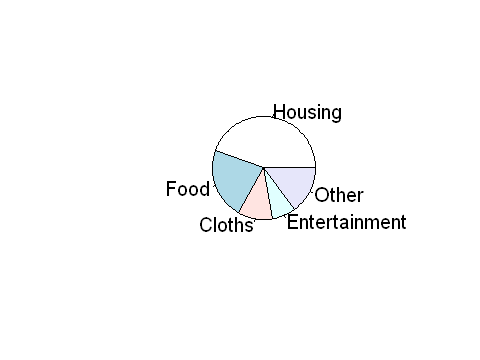

In [17]:
# create a pie chart
pie(expenditure)

### Bar Plot

To create a bar plot, use ``barplot()``<br>
Data type: 
> Numerics

Argument Input types:
> vector, or matrix

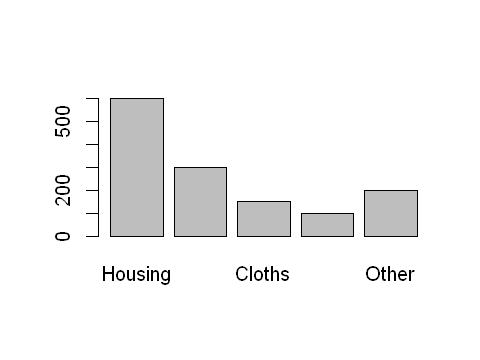

In [22]:
barplot(expenditure)

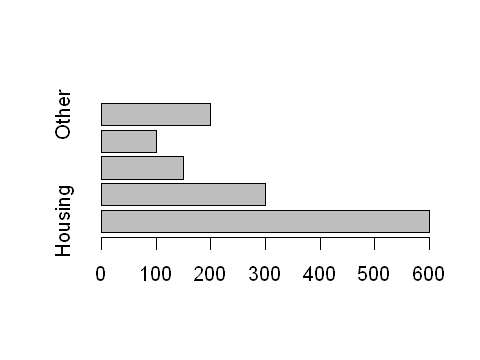

In [21]:
# horizontal bar plot
barplot(expenditure, horiz=TRUE)

# ggplot2

In [23]:
# import ggplot2 library
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

The syntax to plot in ggplot2:<br>
``ggplot(data, aes(variables, arguments)) + geom_geometryshape()``, where ``geometryshape`` can be chosen in the available list, i.e., ``bar``

In [25]:
?data.frame

### Bar Plot

To create a bar plot, use ``geom_bar()``

In [24]:
# create categorical data
data <- data.frame(name=c("A", "B", "C"), value=c(50, 12, 30))
data

name,value
A,50
B,12
C,30


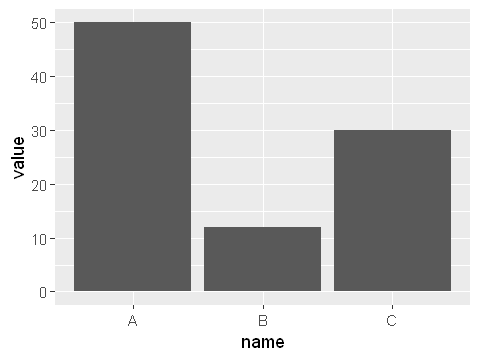

In [28]:
# barplot
ggplot(data, aes(x=name, y=value)) + geom_bar(stat="identity")
# Note : aesthetics

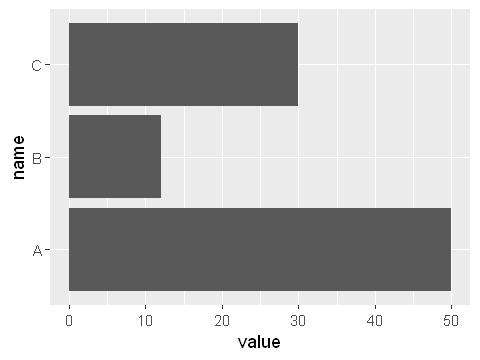

In [31]:
# Horizontal barplot
ggplot(data, aes(x=name, y=value)) + geom_bar(stat="identity") + coord_flip()

### Box Plot

To create a box plot, use ``geom_boxplot()``

In [30]:
# create data
df <- data.frame(name=rep("A", 100), value=rnorm(100))
#df

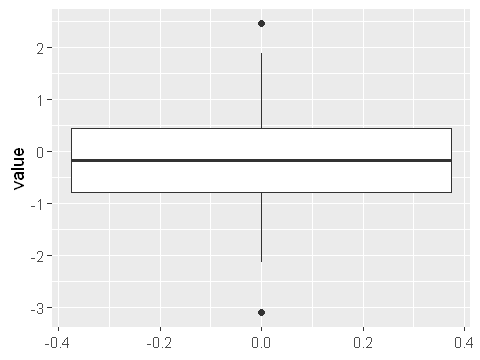

In [31]:
ggplot(data=df, aes(y=value)) + geom_boxplot()

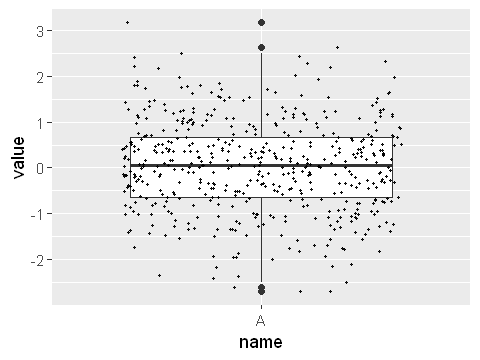

In [71]:
# with jitter
ggplot(data, aes(x=name, y=value))+geom_boxplot()+geom_jitter(color="black", size=0.4, alpha=0.9)

### Histogram

To create a historgram, use ``geom_histogram()``

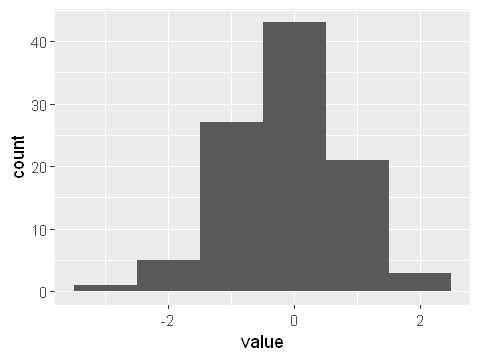

In [35]:
ggplot(data=df, aes(x=value)) + geom_histogram(binwidth=1)

### Denisty

To create a density plot, use ``geom_density()``

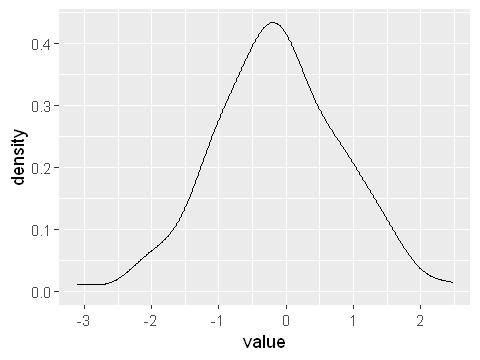

In [36]:
ggplot(data=df, aes(x=value)) + geom_density()

### Scatter Plot

To create a scatter plot, use ``geom_point()``

In [40]:
# rbind()
# create data
x <- rnorm(100)
y <- x + rnorm(100) # y<- x^2
df <- data.frame(xval=x, yval=y)
head(df, n=4) 

xval,yval
0.71515989,0.4875257
0.83996682,0.1746980
-1.83074781,-1.1472714
-0.05897931,0.8685026


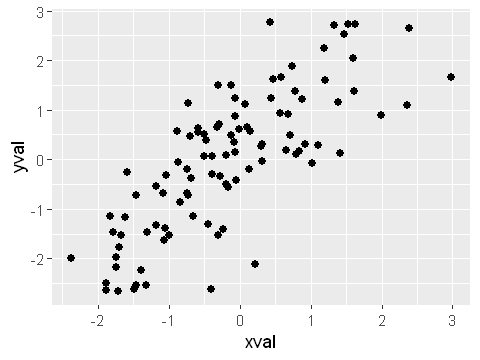

In [41]:
# scatter plot
ggplot(data=df, aes(x=xval, y=yval)) + geom_point(size=2)

`geom_smooth()` using formula 'y ~ x'


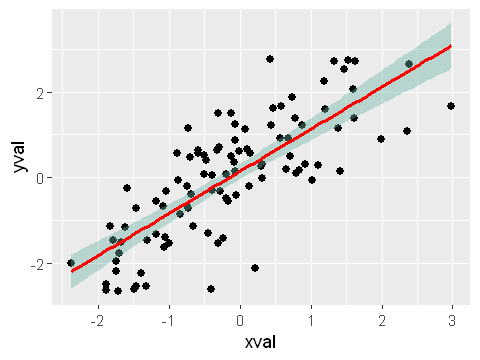

In [42]:
# with linear trend and confidence interval use geom_smooth()
ggplot(data=df, aes(x=xval, y=yval)) + geom_point(size=2) +  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE)

### Line Plot

To create a line plot, use ``geom_line()``

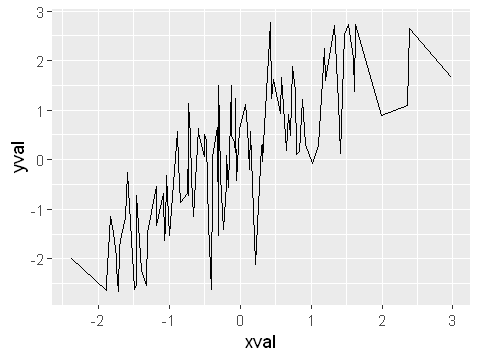

In [43]:
ggplot(data=df, aes(x=xval, y=yval)) + geom_line()

# Application

In [46]:
# To read data, import "readr" library (like Pandas in Python import pandas)
library("readr")
# Read Titanic data set
titanic_data <- read_csv("C:\\Users\\famille\\Documents\\train.csv")
# Print the frist 5 rows
head(titanic_data, n=5)

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S


To read a text file (extension ``.txt``,  use ``read_tsv(file_name)`` or ``read.table``

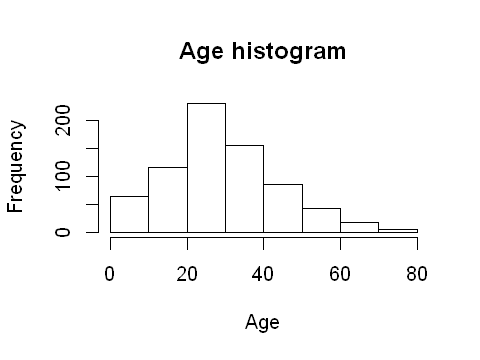

In [48]:
hist(titanic_data$Age, xlab="Age", main="Age histogram") # titanic_data.Age or titanic_data['Age'], titanic_data$Age

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

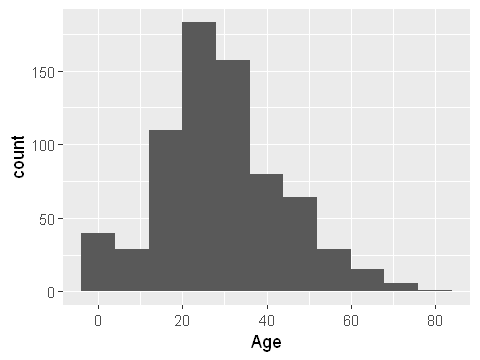

In [49]:
ggplot(data=titanic_data, aes(x=Age)) + geom_histogram(binwidth=8)

In [50]:
# Count numbers of obersvation in the data frame
counts <- table(titanic_data$Survived)
counts


  0   1 
549 342 

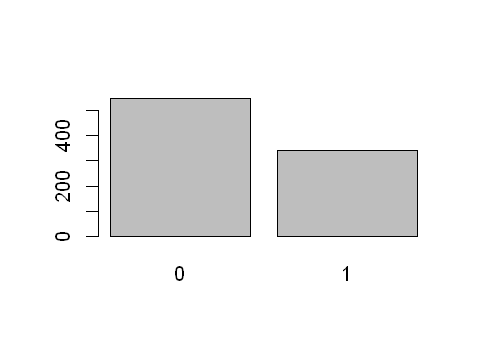

In [51]:
barplot(counts)

In [52]:
counts_per_sex <- table(titanic_data$Survived, titanic_data$Sex)
counts_per_sex
#barplot(counts, )

   
    female male
  0     81  468
  1    233  109

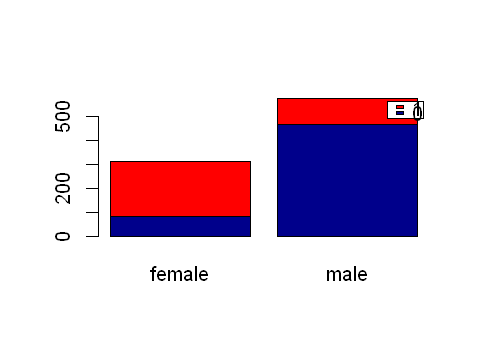

In [54]:
#counts[2,1:2]
barplot(counts_per_sex, col=c("darkblue","red"),
  legend = rownames(counts))

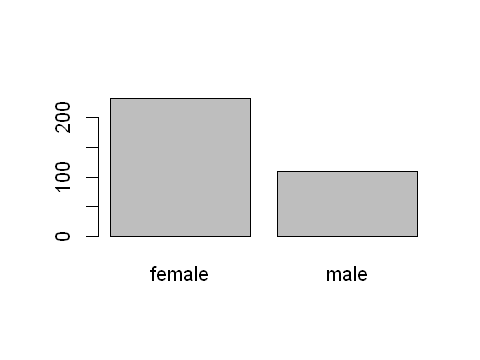

In [55]:
barplot(counts_per_sex[2,1:2])

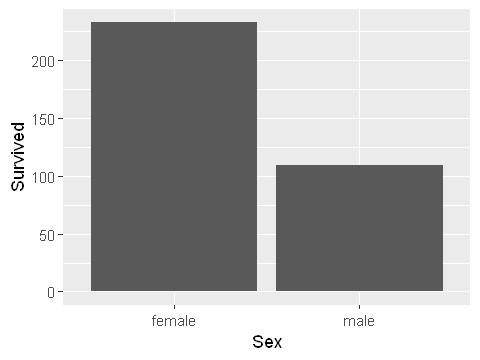

In [56]:
ggplot(titanic_data, aes(x=Sex, y=Survived)) + geom_bar(stat="identity")

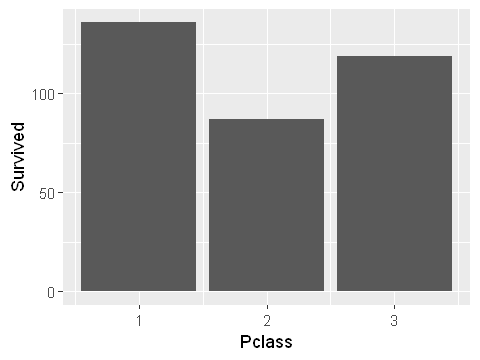

In [57]:
ggplot(titanic_data, aes(x=Pclass, y=Survived)) + geom_bar(stat="identity")